# **Text Language Identification**

Identification of language of given text is done by State of the Art RNN Models such Long Short Term Memory(LSTM Model) and Gated Recurrent Unit(GRU Model)
 


In [3]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**DATA EXPLORATION**

In [4]:
#Loading the Data
raw = pd.read_csv('dataset.csv')

In [5]:
#Manually encoding the labels of language and considering it as the labels for training
languages = list(raw['language'].unique())
l = []
for i in range(raw.shape[0]):
  l.append(languages.index(raw['language'][i]))
raw['nlanguage'] = l

In [6]:
raw.head()

,Text,language,nlanguage
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,0
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,1
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,2
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,3
4,de spons behoort tot het geslacht haliclona en...,Dutch,4


**EXPLORATORY DATA ANALYSIS**

In [7]:
#Merging 2 Labels files for EDA
EDA = raw.drop(["Text"],axis=1)


In [8]:
#Class Distribution
class_df = EDA.groupby('language').count()['nlanguage'].reset_index().sort_values(by='nlanguage',ascending=False)
class_df.style.background_gradient(cmap='PiYG')

,language,nlanguage
0,Arabic,1000
1,Chinese,1000
20,Turkish,1000
19,Thai,1000
18,Tamil,1000
17,Swedish,1000
16,Spanish,1000
15,Russian,1000
14,Romanian,1000
13,Pushto,1000


# **DATA PREPROCESSING**
Tokenizing the text data

In [9]:
#Importing Necessary Libraries for Text Processing

from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [10]:
#Splitting the Data set into Dependent and Independent Features
X=raw['Text']
y=raw['nlanguage']

In [11]:
#Maximum Length of Sequence
max_len = np.max(X.apply(lambda x :len(x)))
print("Maximum length of sequence:",max_len)

Maximum length of sequence: 1341


In [12]:
#Initializing Tokens
tokenizer = Tokenizer()

#Text to Sequence
tokenizer.fit_on_texts(X)
vocab_length = len(tokenizer.word_index)+1
print("Length of Word Index:",vocab_length)
X = tokenizer.texts_to_sequences(X)

#Post Padding
X = pad_sequences(X,maxlen=max_len, padding='post')

Length of Word Index: 273968


In [13]:
#Array of Text Tokens
X

array([[ 32328,  96397,  14738, ...,      0,      0,      0],
       [ 96411,   3149,  22200, ...,      0,      0,      0],
       [ 58287,  58288,  58289, ...,      0,      0,      0],
       ...,
       [   118,  11675,      1, ...,      0,      0,      0],
       [273960, 273961,     16, ...,      0,      0,      0],
       [  3012,  21731,  57498, ...,      0,      0,      0]], dtype=int32)

In [14]:
#Shape of X
X.shape

(22000, 1341)

# **State of the Art Model**
Implementing 2 State of the Art Model of RNN for NLP task GRU and LSTM 

In [15]:
#Performing Test-Train-Valid Split in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [16]:
#Shape of the Training and Testing Data
X_train.shape, X_test.shape,  y_train.shape, y_test.shape #,y_val.shape,X_val.shape

((17600, 1341), (2200, 1341), (17600,), (2200,))

In [17]:
#Dimension of Embedding
embedding_dim = 32

**RECURRENT NEURAL NET: GRU LAYER**

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(22, activation='softmax')
])
#Model Summary of GRU Layer Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1341, 32)          8766976   
_________________________________________________________________
bidirectional (Bidirectional (None, 1341, 512)         445440    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                1430      
Total params: 9,246,678
Trainable params: 9,246,678
Non-trainable params: 0
_________________________________________________________________


In [19]:
# GRU Model Compilation 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"])

In [20]:
#Fitting the Model
gru=model.fit(X_train, y_train,
               callbacks=[EarlyStopping(monitor='val_loss', mode='min' , verbose =1, patience = 2)],
          validation_data=(X_test,y_test),
          epochs=10)

Epoch 1/10
550/550 [==============================] - 145s 203ms/step - loss: 3.0164 - accuracy: 0.0619 - val_loss: 2.0884 - val_accuracy: 0.3936
Epoch 2/10
550/550 [==============================] - 111s 202ms/step - loss: 2.2096 - accuracy: 0.5487 - val_loss: 0.2947 - val_accuracy: 0.9141
Epoch 3/10
550/550 [==============================] - 111s 202ms/step - loss: 0.3174 - accuracy: 0.9019 - val_loss: 0.2744 - val_accuracy: 0.9136
Epoch 4/10
550/550 [==============================] - 111s 202ms/step - loss: 0.1554 - accuracy: 0.9465 - val_loss: 0.2552 - val_accuracy: 0.9155
Epoch 5/10
550/550 [==============================] - 111s 201ms/step - loss: 0.0709 - accuracy: 0.9815 - val_loss: 0.3386 - val_accuracy: 0.9059
Epoch 6/10
550/550 [==============================] - 111s 201ms/step - loss: 0.0358 - accuracy: 0.9926 - val_loss: 0.5169 - val_accuracy: 0.9073
Epoch 00006: early stopping


**RECURRENT NEURAL NETWORK : LSTM LAYER**

In [21]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(22, activation='softmax')
])
#Model Summary of LSTM Layer Architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1341, 32)          8766976   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1341, 512)         591872    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 22)                1430      
Total params: 10,033,110
Trainable params: 10,033,110
Non-trainable params: 0
_________________________________________________________________


In [22]:
#LSTM Model Compilation 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model2.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"])

In [23]:
#Fitting the Model
lstm=model2.fit(X_train, y_train,
               callbacks=[EarlyStopping(monitor='val_loss', mode='min' , verbose =1, patience = 2)],
          validation_data=(X_test,y_test),
          epochs=10)

Epoch 1/10
550/550 [==============================] - 195s 347ms/step - loss: 2.0367 - accuracy: 0.3198 - val_loss: 0.4928 - val_accuracy: 0.8627
Epoch 2/10
550/550 [==============================] - 190s 346ms/step - loss: 0.4490 - accuracy: 0.8503 - val_loss: 0.3069 - val_accuracy: 0.9014
Epoch 3/10
550/550 [==============================] - 190s 345ms/step - loss: 0.1458 - accuracy: 0.9597 - val_loss: 0.3075 - val_accuracy: 0.9059
Epoch 4/10
550/550 [==============================] - 190s 346ms/step - loss: 0.0438 - accuracy: 0.9891 - val_loss: 0.2819 - val_accuracy: 0.9195
Epoch 5/10
550/550 [==============================] - 190s 346ms/step - loss: 0.0248 - accuracy: 0.9936 - val_loss: 0.3201 - val_accuracy: 0.9209
Epoch 6/10
550/550 [==============================] - 191s 347ms/step - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.3434 - val_accuracy: 0.9182
Epoch 00006: early stopping


# **MODEL EVALUATION**
Calculating Accuracy, Confusion Matrix, F1-score(micro), F1-score(macro), Precision for each model 

**Prediction on Test Data**

In [24]:
#Making Prediction for GRU model
pred_gru = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
#Predicted Output
pred_gru

array([18, 16, 16, ..., 14, 10,  8])

Accuracy for GRU Model :  0.9072727272727272
F1 score (micro) for GRU Model :  0.9072727272727272
F1 score (macro) for GRU Model :  0.899191228407145
Precision Score for GRU Model :  0.909245490551201


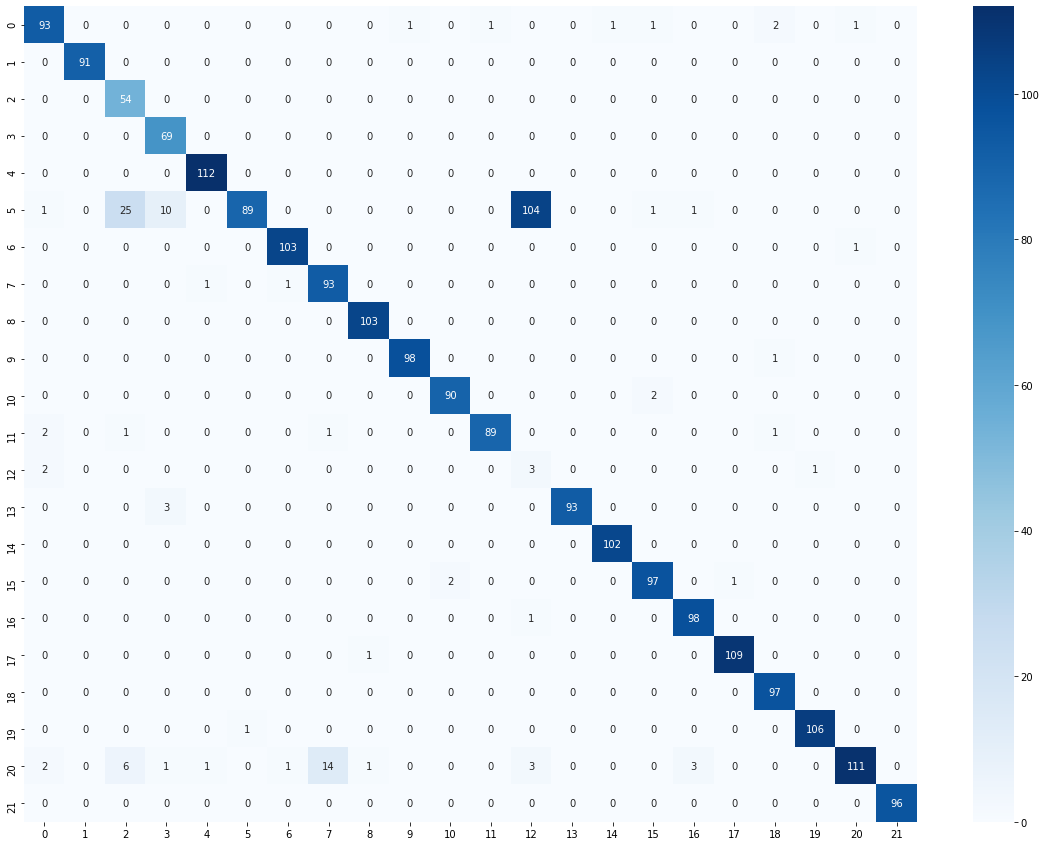

In [26]:
#Create confusion matrix for GRU Model
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score
cnf_metrics = confusion_matrix(pred_gru,y_test)
cnf_metrics

#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(cnf_metrics, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

#Calculating accuracy based in the confusion matrix for GRU Model
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
gru_accuracy = cnf_metrics.trace()/cnf_metrics.sum()
print("Accuracy for GRU Model : ", gru_accuracy)

#Getting F1 micro score for GRU Model
from sklearn.metrics import f1_score
gru_f1 = f1_score(pred_gru,y_test, average = 'micro')
print("F1 score (micro) for GRU Model : ", gru_f1)

#Getting F1 macro score for GRU Model 
from sklearn.metrics import f1_score
gru_f1_ma = f1_score(pred_gru,y_test, average = 'macro')
print("F1 score (macro) for GRU Model : ", gru_f1_ma)

gru_precision = precision_score(pred_gru,y_test, average = 'macro')
print("Precision Score for GRU Model : ", gru_precision)


In [27]:
# Exporting the predictions of GRU Model
gru_prediction_list = []
for i in range(len(pred_gru)):
  gru_prediction_list.append(languages[pred_gru[i]])
prediction_gru = pd.DataFrame(gru_prediction_list)
prediction_gru.columns=['Predicted_Language']
prediction_gru.to_csv('gru_predictions.csv')

In [28]:
#Making Prediction for LSTM Model
pred_lstm = model2.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Create confusion matrix for LSTM Model
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score
cnf_metrics_lstm = confusion_matrix(pred_lstm,y_test)
cnf_metrics_lstm

#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(cnf_metrics_lstm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

#Calculating accuracy based in the confusion matrix for LSTM Model 
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
lstm_accuracy = cnf_metrics_lstm.trace()/cnf_metrics.sum()
print("Accuracy for LSTM Model : ", lstm_accuracy)

#Getting F1 micro score for LSTM Model 
from sklearn.metrics import f1_score
lstm_f1 = f1_score(pred_lstm,y_test, average = 'micro')
print("F1 score (micro) for LSTM Model : ", lstm_f1)

#Getting F1 macro score for LSTM Model
from sklearn.metrics import f1_score
lstm_f1_ma = f1_score(pred_lstm,y_test, average = 'macro')
print("F1 score (macro) for LSTM Model : ", lstm_f1_ma)

lstm_precision = precision_score(pred_lstm,y_test, average = 'macro')
print("Precision Score for LSTM Model  : ", lstm_precision)


In [30]:
# Exporting the predictions of LSTM Model
lstm_prediction_list = []
for i in range(len(pred_gru)):
  lstm_prediction_list.append(languages[pred_lstm[i]])
prediction_lstm = pd.DataFrame(lstm_prediction_list)
prediction_lstm.columns=['Predicted_Language']
prediction_lstm.to_csv('lstm_predictions.csv')

In [ ]:
results = pd.DataFrame({
    'State of Art Model': ['RNN w/ GRU Architecture','RNN w/ LSTM Architecture'],
    'Accuracy': [gru_accuracy,lstm_accuracy],
    'F1-score(micro)': [gru_f1,lstm_f1],
    'F1-score(macro)': [gru_f1_ma,lstm_f1_ma],
    'Precision-score': [gru_precision,lstm_precision]})
results

In [34]:
print("""State of the Art Model Results for Language Identification Task""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(results,headers="keys",tablefmt="fancy_grid"))

State of the Art Model Results for Language Identification Task
╒════╤══════════════════════════╤════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│    │ State of Art Model       │   Accuracy │   F1-score(micro) │   F1-score(macro) │   Precision-score │
╞════╪══════════════════════════╪════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│  0 │ RNN w/ GRU Architecture  │   0.907273 │          0.907273 │          0.899191 │          0.909245 │
├────┼──────────────────────────┼────────────┼───────────────────┼───────────────────┼───────────────────┤
│  1 │ RNN w/ LSTM Architecture │   0.918182 │          0.918182 │          0.917643 │          0.919846 │
╘════╧══════════════════════════╧════════════╧═══════════════════╧═══════════════════╧═══════════════════╛
